<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Distribution-vs.-Weather,-Season,-Working-Day" data-toc-modified-id="Distribution-vs.-Weather,-Season,-Working-Day-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Distribution vs. Weather, Season, Working Day</a></span></li><li><span><a href="#Distribution-vs.-Temperature" data-toc-modified-id="Distribution-vs.-Temperature-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Distribution vs. Temperature</a></span></li><li><span><a href="#Missing-Data-Fields" data-toc-modified-id="Missing-Data-Fields-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Missing Data Fields</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Hourly-Distribution" data-toc-modified-id="Hourly-Distribution-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Hourly Distribution</a></span></li><li><span><a href="#Monthly-Distribution" data-toc-modified-id="Monthly-Distribution-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Monthly Distribution</a></span></li><li><span><a href="#Outliers-Analysis" data-toc-modified-id="Outliers-Analysis-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Outliers Analysis</a></span><ul class="toc-item"><li><span><a href="#Weather-=-'Heavy-Snow/Rain'-outlier" data-toc-modified-id="Weather-=-'Heavy-Snow/Rain'-outlier-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Weather = 'Heavy Snow/Rain' outlier</a></span></li><li><span><a href="#Zscore-&gt;4-Pruning" data-toc-modified-id="Zscore->4-Pruning-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Zscore &gt;4 Pruning</a></span></li></ul></li><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Correlation Analysis</a></span><ul class="toc-item"><li><span><a href="#Regression-Plots-vs.-Temperature,-Humidity-and-Windspeed" data-toc-modified-id="Regression-Plots-vs.-Temperature,-Humidity-and-Windspeed-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Regression Plots vs. Temperature, Humidity and Windspeed</a></span></li><li><span><a href="#Heatmap-Plot" data-toc-modified-id="Heatmap-Plot-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>Heatmap Plot</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

# Read the data
mydata = pd.read_csv('./../Data/train.csv', parse_dates=True, index_col='datetime')
testdata = pd.read_csv('./../Data/test.csv', parse_dates=True, index_col='datetime')

# Converting into categorical data
category_list = ['season', 'holiday', 'workingday', 'weather']
for var in category_list:
    mydata[var] = mydata[var].astype('category')
    testdata[var] = testdata[var].astype('category')

# Mapping numbers to understandable text
season_dict = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
weather_dict = {1:'Clear', 2:'Misty+Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain'}
mydata['season'] = mydata['season'].map(season_dict)
mydata['weather'] = mydata['weather'].map(weather_dict)

testdata['season'] = testdata['season'].map(season_dict)
testdata['weather'] = testdata['weather'].map(weather_dict)

# EDA

## Distribution vs. Weather, Season, Working Day 
Let us see how 'count' = number of bikes rented varies across the various categorical data (weather, season, working day)

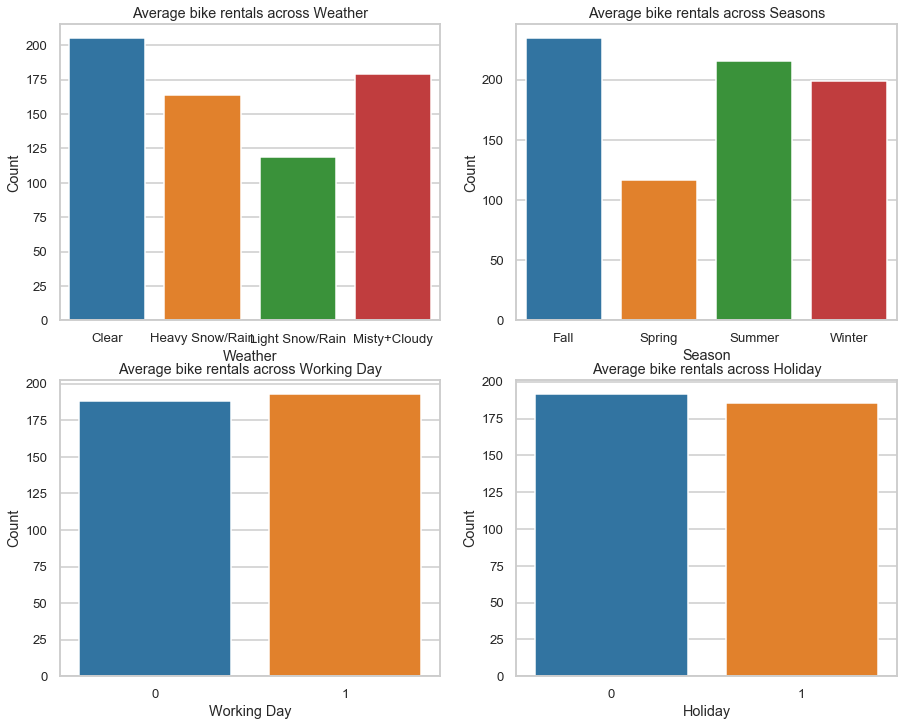

In [2]:
# Average values across each of the categorical columns 
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 1)
group_weather = pd.DataFrame(mydata.groupby(['weather'])['count'].mean()).reset_index()
sns.barplot(data=group_weather, x='weather', y='count', ax=axes)
axes.set(xlabel='Weather', ylabel='Count', title='Average bike rentals across Weather')

axes = fig.add_subplot(2, 2, 2)
group_season = pd.DataFrame(mydata.groupby(['season'])['count'].mean()).reset_index()
sns.barplot(data=group_season, x='season', y='count', ax=axes)
axes.set(xlabel='Season', ylabel='Count', title='Average bike rentals across Seasons')

axes = fig.add_subplot(2, 2, 3)
group_workingday = pd.DataFrame(mydata.groupby(['workingday'])['count'].mean()).reset_index()
sns.barplot(data=group_workingday, x='workingday', y='count', ax=axes)
axes.set(xlabel='Working Day', ylabel='Count', title='Average bike rentals across Working Day')

axes = fig.add_subplot(2, 2, 4)
group_season = pd.DataFrame(mydata.groupby(['holiday'])['count'].mean()).reset_index()
sns.barplot(data=group_season, x='holiday', y='count', ax=axes)
axes.set(xlabel='Holiday', ylabel='Count', title='Average bike rentals across Holiday')
plt.show()

Using seaborn boxplots to get an idea of the distribution and outliers acorss various categorical features 

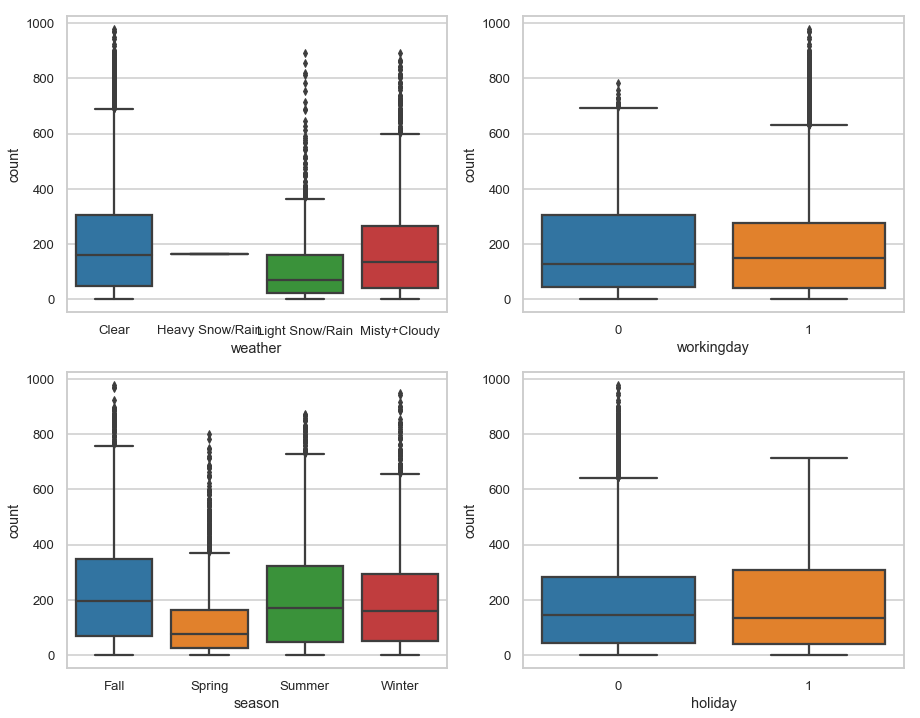

In [3]:
# Seaborn boxplots to get an idea of the distribution/outliers
f, axes = plt.subplots(2, 2, figsize=(15, 12))
hue_order= ['Clear', 'Heavy Snow/Rain', 'Light Snow/Rain', 'Misty+Cloudy']
sns.boxplot(data=mydata, y='count', x='weather', ax=axes[0][0], order=hue_order)
sns.boxplot(data=mydata, y='count', x='workingday', ax=axes[0][1])
hue_order= ['Fall', 'Spring', 'Summer', 'Winter']
sns.boxplot(data=mydata, y='count', x='season', ax=axes[1][0], order=hue_order)
sns.boxplot(data=mydata, y='count', x='holiday', ax=axes[1][1])

plt.show()

**Few Observations**
+ Higher biker rentals as weather is more clear and sunny. 
+ Just '1 hour' instance where there were rentals under heavy rain/snow condition. Two possibilities
    + Could be an outlier
    + Reservations made at a time when the weather was good. But weather conditions logged sometime later in the same hour when the conditions were heavy rains/snow
+ Bike reservations are lesser in Spring season compared to Summer and Fall
+ Lots of outlier points for a particular seasons or weather conditions. This is most likely due to variable distribution across the day

## Distribution vs. Temperature 
Now let us see how number of bikes rented depends on the temperature

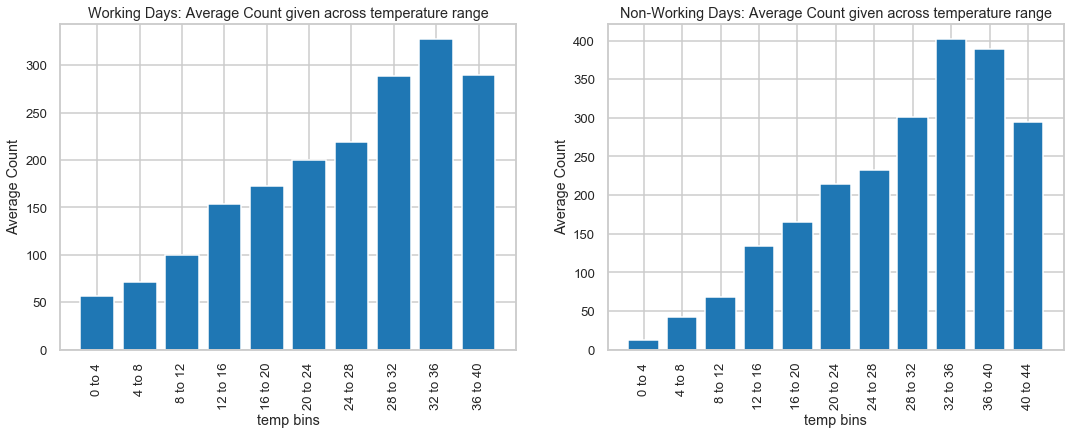

In [4]:
# Splitting data into working-day and non-working day
mydata_w = mydata[mydata.workingday==1]
mydata_nw = mydata[mydata.workingday==0]

bin_size = 4
mydata_w['temp_round'] = mydata_w['temp']//bin_size
mydata_nw['temp_round'] = mydata_nw['temp']//bin_size

mean_count_vs_temp_w = mydata_w.groupby('temp_round')['count'].mean()
mean_count_vs_temp_nw = mydata_nw.groupby('temp_round')['count'].mean()
idx_w, idx_nw = range(len(mean_count_vs_temp_w)), range(len(mean_count_vs_temp_nw))
labels_w = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(len(mean_count_vs_temp_w))]
labels_nw = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(len(mean_count_vs_temp_nw))]

fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
plt.bar(x=idx_w, height=mean_count_vs_temp_w)
plt.xticks(idx_w, labels_w, rotation=90)
plt.xlabel('temp bins')
plt.ylabel('Average Count')
plt.title('Working Days: Average Count given across temperature range')

axes = fig.add_subplot(1, 2, 2)
plt.bar(x=idx_nw, height=mean_count_vs_temp_nw)
plt.xticks(idx_nw, labels_nw, rotation=90)
plt.xlabel('temp bins')
plt.ylabel('Average Count')
plt.title('Non-Working Days: Average Count given across temperature range')

plt.show()

**Observation**
* From the above histogram plot, we can see that there is a steady increase in the average bikes rented with temperature with a small decrease at the highest temperature bin

## Feature Engineering

Lets, split the datetime column into ['month', 'date', 'day', 'hour'] categories since the bike demand is more likely dependent on these individual categories. Creating these 4 additional category columns 

In [5]:
# Splitting datetime object into month, date, hour and day category columns
mydata['month'] = [x.month for x in mydata.index]
mydata['date'] = [x.day for x in mydata.index]
mydata['hour'] = [x.hour for x in mydata.index]
mydata['day'] = [x.weekday() for x in mydata.index]

testdata['month'] = [x.month for x in testdata.index]
testdata['date'] = [x.day for x in testdata.index]
testdata['hour'] = [x.hour for x in testdata.index]
testdata['day'] = [x.weekday() for x in testdata.index]

category_list = ['month', 'date', 'hour', 'day']
for var in category_list:
    mydata[var] = mydata[var].astype('category')
    testdata[var] = testdata[var].astype('category')

Mapping 0 to 6 day indices to Monday to Saturday 

In [6]:
# Mapping 0 to 6 day indices to Monday to Saturday 
day_dict = {0:'Monday', 1:'Teusday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
mydata['day'] = mydata['day'].map(day_dict)
testdata['day'] = testdata['day'].map(day_dict)

mydata.head(n=3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,date,hour,day
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,1,1,0,Saturday
2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,1,1,1,Saturday
2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,1,1,2,Saturday


## Hourly Distribution

Now that we have separated out the hour data, let us plot the distribution across hour in a day. Clearly, we expect to see some pattern in the distribution - for example, people would tend to rent bikes early in the morning and return them in the evening. 

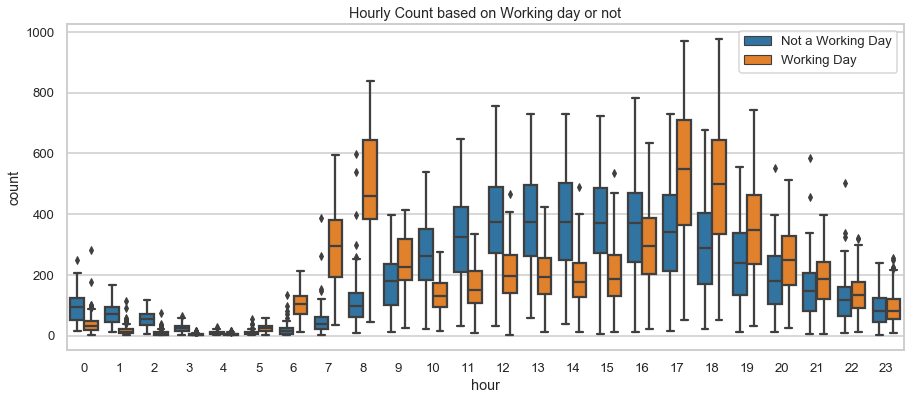

In [7]:
# seaborn boxplots across hours
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.boxplot(data=mydata, y='count', x='hour', hue='workingday', ax=axes)
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
axes.set(title='Hourly Count based on Working day or not')

plt.show()

Plotting average bike count for each hour as a function of various categories. 

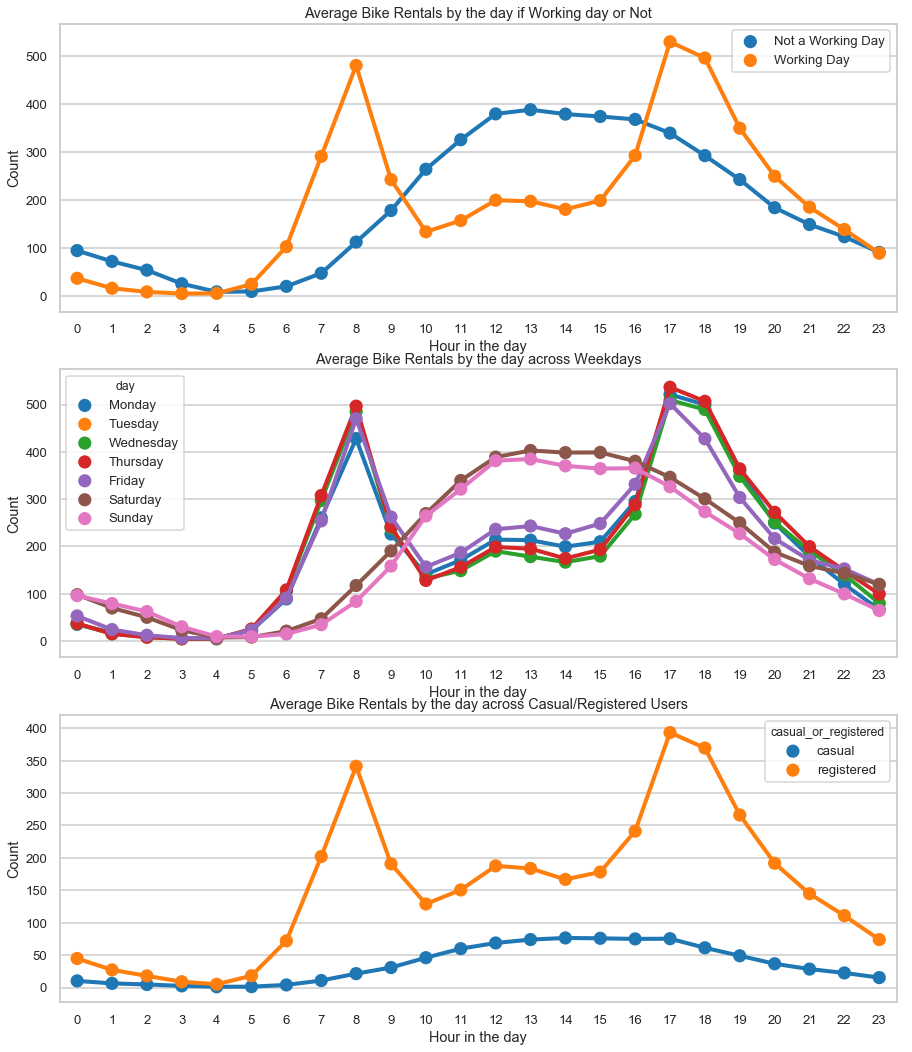

In [8]:
# Plots of average count across hour in a day for various categories

f, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))
group_work_hour = pd.DataFrame(mydata.groupby(['workingday', 'hour'])['count'].mean()).reset_index()
sns.pointplot(data=group_work_hour, x='hour', y='count', hue='workingday', ax=axes[0], legend=True)
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ['Not a Working Day', 'Working Day'])
axes[0].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day if Working day or Not')

hue_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
group_day_hour = pd.DataFrame(mydata.groupby(['day', 'hour'])['count'].mean()).reset_index()
sns.pointplot(data=group_day_hour, x='hour', y='count', hue='day', ax=axes[1], hue_order=hue_order)
axes[1].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day across Weekdays')

df_melt = pd.melt(frame=mydata, id_vars='hour', value_vars=['casual', 'registered'], value_name='count', var_name='casual_or_registered')
group_casual_hour = pd.DataFrame(df_melt.groupby(['hour', 'casual_or_registered'])['count'].mean()).reset_index()
sns.pointplot(data=group_casual_hour, x='hour', y='count', hue='casual_or_registered', ax=axes[2])
axes[2].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day across Casual/Registered Users')

plt.show()

## Monthly Distribution

Now let us look at the average count of bike rentals across the months

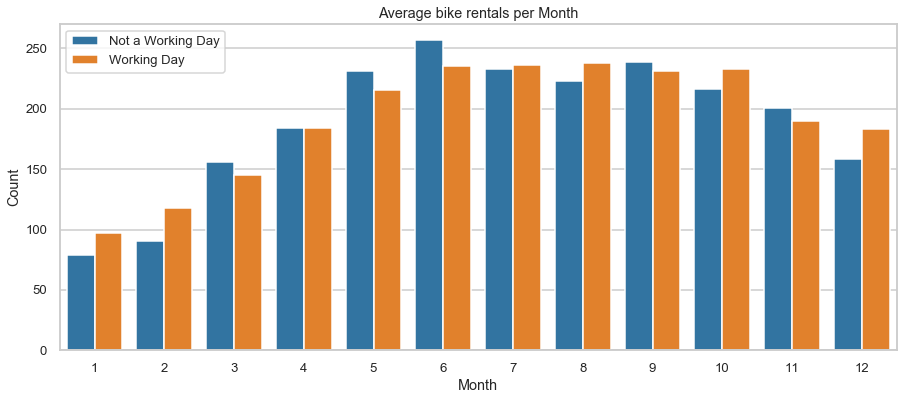

In [9]:
# Average Monthly Count Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = pd.DataFrame(mydata.groupby(['month', 'workingday'])['count'].mean()).reset_index()
sns.barplot(data=group_month, x='month', y='count', hue='workingday', ax=axes)
axes.set(xlabel='Month', ylabel='Count', title='Average bike rentals per Month')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
plt.show()

**Observations**
* Lesser number of outliers can be seen in the seaborn box plot across hours indicating that most of the outliers are due to highly varying distribution during the day
* Higher reservations can be seen at around 8am and 5pm (office hours) and close to 0 reservations very early in the morning
* From the above plot we can see the 2 patterns across the hours in a day in bike rentals
    * Working Day: First pattern where there is a peak in the rentals at around 8am and another at around 5pm. These correspond to working local bikers who typically are ``registered`` and go to work on ``working day`` which are ``Monday`` to ``Friday``
    * Non Working Day: Second pattern where there is more or less a uniform rentals across the day with a peak at around noon time. These correspond to probably tourists who typically are ``casual`` users who rent/drop off bikes uniformly during the day and tour the city of Washington on ``non working days`` which typically are ``Saturday`` and ``Sunday``
* Also, we can see that we have more bike rentals during the Fall (July to September) and Summer (April to June) Season.

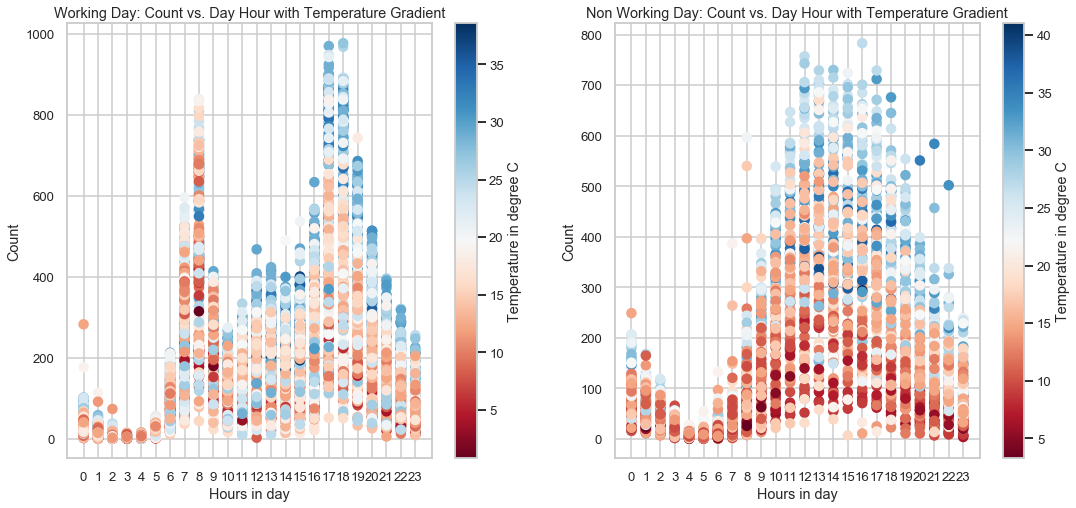

In [10]:
mydata_w = mydata[mydata.workingday==1]
mydata_nw = mydata[mydata.workingday==0]

fig = plt.figure(figsize=(18, 8))
# Working Day
axes = fig.add_subplot(1, 2, 1)
f = axes.scatter(mydata_w.hour, mydata_w['count'], c=mydata_w.temp, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='Count', title='Working Day: Count vs. Day Hour with Temperature Gradient')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

# Non Working Day
axes = fig.add_subplot(1, 2, 2)
f = axes.scatter(mydata_nw.hour, mydata_nw['count'], c=mydata_nw.temp, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='Count', title='Non Working Day: Count vs. Day Hour with Temperature Gradient')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

plt.show()

**Observations**
* From the above, we can see that in general, more people tend to prefer biking at moderate to high temperatures; however, if the temperature is too hot (darkest of the blue dots), there is a small decline in count

## Outliers Analysis 

### Weather = 'Heavy Snow/Rain' outlier
We had earlier seen a single observation with 'Heavy Snow/Rain' recording. Let us extract that observation to see if it is an outlier and how we should handle that data point. 

In [11]:
heavy_weather_data = mydata.loc[mydata['weather']=='Heavy Snow/Rain', :]
print(heavy_weather_data.index)
mydata['2012-01-09 08:00' : '2012-01-09 20:00']

DatetimeIndex(['2012-01-09 18:00:00'], dtype='datetime64[ns]', name='datetime', freq=None)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,date,hour,day
datetime,,,,,,,,,,,,,,,
2012-01-09 08:00:00,Spring,0,1,Misty+Cloudy,9.02,12.880,55,6.0032,13,407,420,1,9,8,Monday
2012-01-09 09:00:00,Spring,0,1,Misty+Cloudy,9.02,13.635,64,0.0000,9,188,197,1,9,9,Monday
2012-01-09 10:00:00,Spring,0,1,Clear,9.84,14.395,60,0.0000,13,95,108,1,9,10,Monday
2012-01-09 11:00:00,Spring,0,1,Misty+Cloudy,10.66,14.395,56,6.0032,6,82,88,1,9,11,Monday
2012-01-09 12:00:00,Spring,0,1,Misty+Cloudy,10.66,13.635,56,7.0015,10,93,103,1,9,12,Monday
2012-01-09 13:00:00,Spring,0,1,Misty+Cloudy,10.66,13.635,56,7.0015,3,77,80,1,9,13,Monday
2012-01-09 14:00:00,Spring,0,1,Light Snow/Rain,9.02,11.365,75,11.0014,5,45,50,1,9,14,Monday
2012-01-09 15:00:00,Spring,0,1,Light Snow/Rain,9.02,11.365,75,11.0014,5,64,69,1,9,15,Monday
2012-01-09 16:00:00,Spring,0,1,Light Snow/Rain,9.02,12.880,87,6.0032,3,46,49,1,9,16,Monday


From the above data, it appears like the weather was indeed bad at 6pm. It was bright and sunny at 10am and slowly got bad (weather = Misty->Light Snow->Heavy Snow) towards the end of the day. Also, there were several registered users who got to work that morning (407 commuters @ 8am). This explains why there were 158 registered commuters even under the worst of the weather conditions 

Since there is just one occurence of Heavy Snow/Rain Condition, let us replace the Heavy Snow/Rain label to Light Snow/Rain. 

In [12]:
# Replacing Heavy/Snow Rain condition with Light Snow/Rain
mydata.loc[mydata['weather']=='Heavy Snow/Rain', 'weather'] = 'Light Snow/Rain'
testdata.loc[testdata['weather']=='Heavy Snow/Rain', 'weather'] = 'Light Snow/Rain'

mydata['2012-01-09 18:00' : '2012-01-09 18:00']

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,date,hour,day
datetime,,,,,,,,,,,,,,,
2012-01-09 18:00:00,Spring,0,1,Light Snow/Rain,8.2,11.365,86,6.0032,6,158,164,1,9,18,Monday


### Zscore >4 Pruning

Let us first take a look at the data entries with zscore > 4, i.e., data with more than 4 standard deviation away from the mean. 

In [13]:
# Function to calculate zscore
def zscore(series): 
    return (series-series.mean())/series.std()

mydata['count_zscore'] = mydata.groupby(['hour', 'workingday'])['count'].transform(zscore)
outlier_idx = np.abs(mydata['count_zscore'])>4
outlier_data = mydata.loc[outlier_idx, :]
print('Shape of the outlier data entries: ', outlier_data.shape)
outlier_data

Shape of the outlier data entries:  (15, 16)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,date,hour,day,count_zscore
datetime,,,,,,,,,,,,,,,,
2011-05-02 00:00:00,Summer,0,1,Clear,18.86,22.725,72,8.9981,68,109,177,5,2,0,Monday,5.328782
2011-05-02 01:00:00,Summer,0,1,Clear,18.86,22.725,72,8.9981,41,73,114,5,2,1,Monday,7.899886
2011-07-15 02:00:00,Fall,0,1,Clear,24.60,28.790,78,11.0014,16,22,38,7,15,2,Friday,4.248737
2012-04-01 06:00:00,Summer,0,0,Misty+Cloudy,14.76,17.425,76,8.9981,9,88,97,4,1,6,Sunday,4.227851
2012-04-16 06:00:00,Summer,1,0,Clear,21.32,25.000,83,11.0014,10,123,133,4,16,6,Monday,6.204331
2012-04-16 07:00:00,Summer,1,0,Clear,21.32,25.000,83,8.9981,20,367,387,4,16,7,Monday,7.784914
2012-04-16 08:00:00,Summer,1,0,Misty+Cloudy,22.96,26.515,83,11.0014,48,549,597,4,16,8,Monday,5.864166
2012-07-04 21:00:00,Fall,1,0,Clear,34.44,40.150,53,8.9981,222,362,584,7,4,21,Wednesday,4.970624
2012-07-04 22:00:00,Fall,1,0,Clear,33.62,39.395,56,15.0013,175,327,502,7,4,22,Wednesday,5.022732


All the outliers occur mostly early in the morning or late at night. Let us prune out these outliers. These could be due to some late night shows or holiday or some party. 

In [14]:
# Removing outliers from mydata
mydata_without_outliers = mydata.loc[~outlier_idx, :]
print('Shape of data before outliner pruning: ', mydata.shape)
print('Shape of data after outlier pruning: ', mydata_without_outliers.shape)

Shape of data before outliner pruning:  (10886, 16)
Shape of data after outlier pruning:  (10871, 16)


Dropping the zscore column from the data frame

In [15]:
# Dropping the zscore column
mydata_without_outliers = mydata_without_outliers.drop('count_zscore', axis=1)
mydata_without_outliers.head(n=3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,date,hour,day
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,1,1,0,Saturday
2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,1,1,1,Saturday
2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,1,1,2,Saturday


## Correlation Analysis

### Regression Plots vs. Temperature, Humidity and Windspeed
Using seaborn to get regression plots with respect to Temperature, Humidity and Windspeed. 

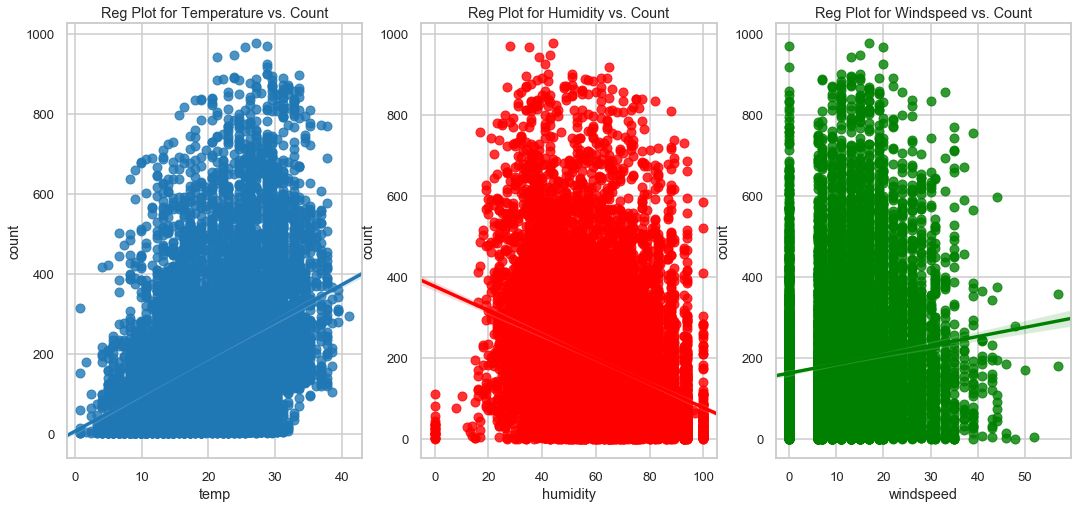

In [16]:
# Regression Plots with respect to Temperature, Humidity and Windspeed
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data=mydata_without_outliers, x='temp', y='count',ax=axes)
axes.set(title='Reg Plot for Temperature vs. Count')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=mydata_without_outliers, x='humidity', y='count',ax=axes, color='r')
axes.set(title='Reg Plot for Humidity vs. Count')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=mydata_without_outliers, x='windspeed', y='count',ax=axes, color='g')
axes.set(title='Reg Plot for Windspeed vs. Count')
plt.show()

**Observations**
* The above regplot indicates a positive correlation of count with temperature and windspeed and a negative correlation with humidity

### Heatmap Plot
Using heatmap plots of all the numerical features to obtain correlation of the bike rental with other numerical features 

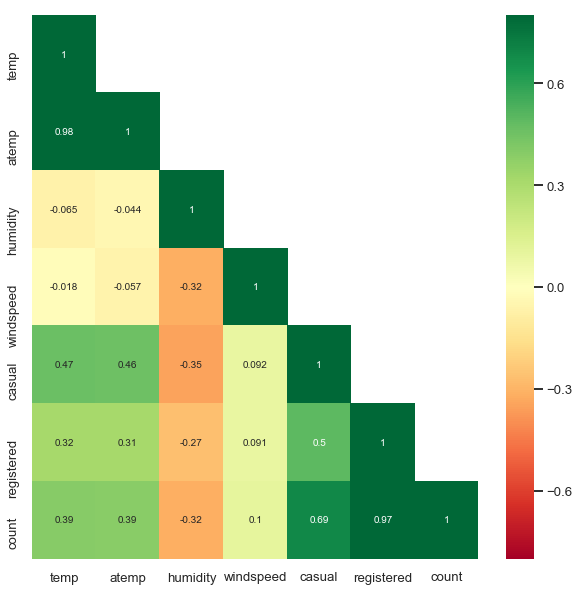

In [17]:
# Heatmap relative to all numeric columns
corr_matrix = mydata_without_outliers.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show()

**Inferences from the above heatmap**
* temp (true temperature) and atemp (feels like temperature) are highly correlated as expected
* count is highly correlated with casual and registered as expected since count = casual + registered
* We see a positive correlation between count and temperature (as was seen in the regplot). This is probably only true for the range of temperatures provided
* We see a negative correlation between count and humidity. The more the humidity, the less people prefer to bike
* Not a great amount of correlation between humidity and temperature, though
* Count has a weak dependence on windspeed